# 1.0 Upload Datasets

In [1]:
# Uploading files from your local file system
# AmesHousing.txt

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving AmesHousing.txt to AmesHousing.txt
User uploaded file "AmesHousing.txt" with length 963738 bytes


# 2.0 A short revision

In [0]:
# Read the dataset
import pandas as pd

data = pd.read_csv("AmesHousing.txt", sep='\t')

In [40]:
# Split the dataset into train and test
from sklearn.model_selection import train_test_split

train, test = train_test_split(data,
                               test_size=0.5,
                               random_state=42)

print("data has {} instances\n {} train instances\n {} test intances".
      format(data.shape[0],train.shape[0],test.shape[0]))

data has 2930 instances
 1465 train instances
 1465 test intances


In [0]:
# 
# Functions
#

import numpy as np

# batch gradient descent  
def gradient_descent(X, y, alpha, iterations, theta):
    m = len(y)
  
    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = [t0, t1]
    return theta
  
# see other gradient descent algorithms
# https://towardsdatascience.com/difference-between-batch-gradient-descent-and-stochastic-gradient-descent-1187f1291aa1

def predict(X,theta):
  return np.dot(X,theta)

In [0]:
from sklearn.metrics import mean_squared_error

# Train X & y
X_train = np.column_stack((np.ones(len(train['Gr Liv Area'])), 
                     train['Gr Liv Area']))
y_train = train['SalePrice']

# Test X & y
X_test = np.column_stack((np.ones(len(test['Gr Liv Area'])), 
                     test['Gr Liv Area']))
y_test = test['SalePrice']

# basic parameters
iterations = 200
alpha = .00000004
theta_initial = [20000,580]

results = []
for i in [1,5,10,15,20,25,30,35,40,45,50,75,100,150,200]:
  
  # use gradient descent to find the theta which minimize the cost function
  theta = gradient_descent(X_train, y_train, alpha, i, theta_initial)
  
  # use the theta to find the root mean square error
  rmse_train = np.sqrt(mean_squared_error(predict(X_train,theta),y_train))
  
  # the same theta must be used to analyse the rmse in test dataset 
  rmse_test = np.sqrt(mean_squared_error(predict(X_test,theta),y_test))
  
  # append all results in a list
  results.append([i,theta,rmse_train,rmse_test])

In [0]:
# [steps, [t0, t1], rmse_train,rmse_test] 
results

In [75]:
# Compare to Scikit-Learn
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])

train_predictions = lr.predict(train[['Gr Liv Area']])
test_predictions = lr.predict(test[['Gr Liv Area']])

train_mse = mean_squared_error(train_predictions, train['SalePrice'])
test_mse = mean_squared_error(test_predictions, test['SalePrice'])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

print("a0: ",lr.intercept_)
print("a1: ", lr.coef_)


55149.826326152855
57879.0081430108
('a0: ', 16177.260052889702)
('a1: ', array([109.05143077]))


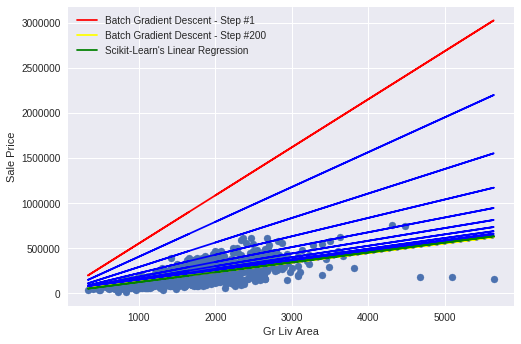

In [89]:
import matplotlib.pyplot as plt

X = data['Gr Liv Area']
y = data['SalePrice']

# plot all points from full dataset
plt.scatter(X,y,label='_nolegend_')

for index,row in enumerate(results):
  if index == 0:
    # plot the first step of gradient descent using a red line
    plt.plot(X,
           predict(np.column_stack((np.ones(len(X)),X)),row[1]),
           color='red',
           label='Batch Gradient Descent - Step #1')
  elif index == len(results)-1:
    plt.plot(X,
           predict(np.column_stack((np.ones(len(X)),X)),row[1]),
           color='yellow',
           label='Batch Gradient Descent - Step #{}'.format(row[0]))
  else:
    plt.plot(X,
           predict(np.column_stack((np.ones(len(X)),X)),row[1]),
           color='blue',
           label='_nolegend_')  
  
# plot the linear regression model from scikit-learn
plt.plot(X,
        lr.predict(data[['Gr Liv Area']]),
        color = "green",
        label = "Scikit-Learn's Linear Regression")
plt.xlabel('Gr Liv Area')
plt.ylabel('Sale Price')
plt.legend(loc="upper left")

plt.show()